# 作業
### 用 iris (dataset.load_iris()) 資料嘗試跑 kmeans (可以測試不同的群數 , init 等)

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans

np.random.seed(5)

%matplotlib inline

In [2]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target

### 載入 相關套件 並 執行 kmean 實驗 ...

- 實驗測試不同的群數
- 實驗測試不同的初始值
- 呈現結果

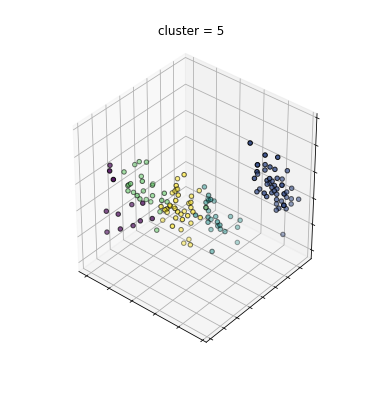

In [3]:
estimators = KMeans(n_clusters=5)

fig = plt.figure(1, figsize=(5, 7))
ax = Axes3D(fig, rect=[0, 0, 1, 0.75], elev=35, azim=130)

estimators.fit(X)
    
labels = estimators.labels_

ax.scatter(X[:, 3], X[:, 0], X[:, 1],
        c=labels.astype(np.float), edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_title('cluster = 5')
ax.dist = 12

In [4]:
X = iris.data
y = iris.target

In [5]:
estimators = [('k_means_9', KMeans(n_clusters=9)),
              ('k_means_6', KMeans(n_clusters=6)),
              ('k_means_3', KMeans(n_clusters=3)),
              ('k_means_init_1', KMeans(n_clusters=3, n_init=1,
                                               init='random')),
              ('k_means_init_2', KMeans(n_clusters=3, n_init=20,
                                               init='random')),
              ('k_means_init_3', KMeans(n_clusters=3, n_init=100,
                                               init='random'))]

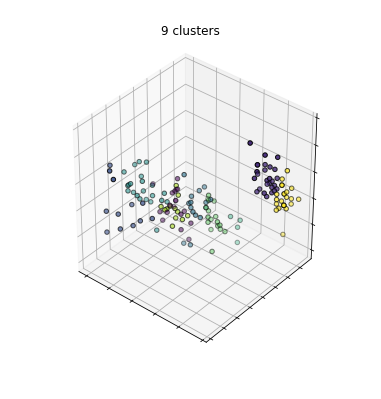

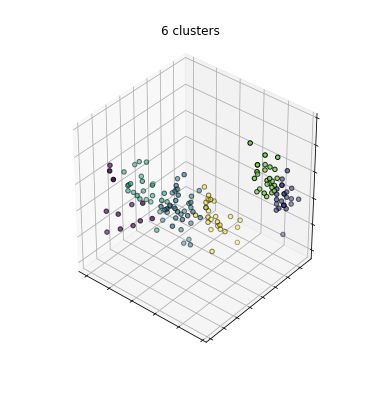

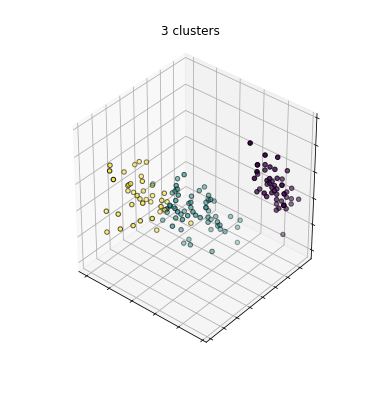

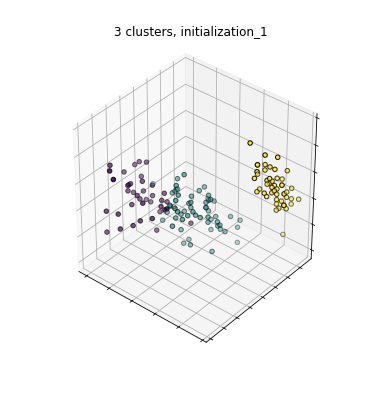

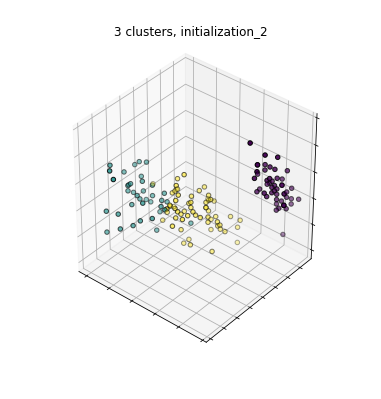

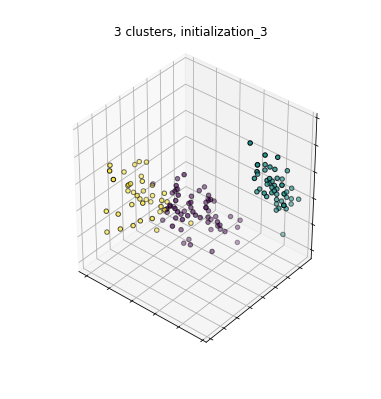

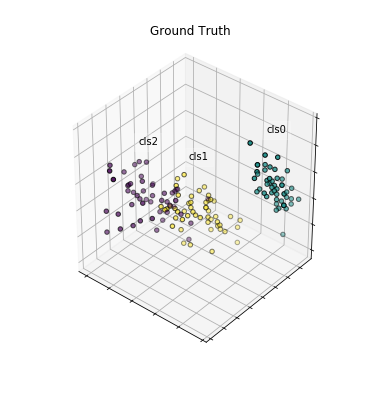

In [6]:
fignum = 1
titles = ['9 clusters', '6 clusters', '3 clusters', '3 clusters, initialization_1', '3 clusters, initialization_2', '3 clusters, initialization_3']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(5, 7))
    ax = Axes3D(fig, rect=[0, 0, 1, 0.75], elev=35, azim=130)
    
    ## fit data
    est.fit(X)
    
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 1],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(5, 7))
ax = Axes3D(fig, rect=[0, 0, 1, 0.75], elev=35, azim=130)

for name, label in [('cls0', 0),
                    ('cls1', 1),
                    ('cls2', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 1].mean()+ 1, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 1], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_title('Ground Truth')
ax.dist = 12

#fig.show()